### Capstone: Intermediate Data Science with Python
In this project we will examine which features buyers prefer over others in the Washington D.C. residential dataset. Of particular interest is the question: do buyers prefer different features (or houses) at different times of year? Also, does proximity to townhomes increase residential value? Which 20-year period produced buildings of the least value (I hypothesize 1965-1985)?

For the ML aspect, I would like to read features of a house and predict its neighborhood and/or price.
Another question would be "What are the most valuable features on the houses?"

Decision Tree: Predict neighborhood (out of the 30 largest neighborhoods)

Decision Tree Regression: Predict year built and/or price, compare to simple Linear Regression via RMSE.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline
df=pd.read_csv("../dc-residential-properties/DC2R.csv", index_col=0)

In [3]:
#Some Basic EDA:
print(df.describe())
print(df.nlargest(20, 'ASSESSMENT_NBHD'))

              BATHRM      NUM_UNITS          ROOMS          BEDRM  \
count  106696.000000  106696.000000  106696.000000  106696.000000   
mean        2.033103       1.198039       7.382329       3.368514   
std         1.062017       0.596924       2.295587       1.100649   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       6.000000       3.000000   
50%         2.000000       1.000000       7.000000       3.000000   
75%         3.000000       1.000000       8.000000       4.000000   
max        14.000000       6.000000      48.000000      24.000000   

                 AYB        STORIES         PRICE            GBA  \
count  106455.000000  106652.000000  5.790000e+04  106696.000000   
mean     1933.888413       2.091793  5.799119e+05    1714.539889   
std        28.307306       2.933323  6.076454e+05     880.677860   
min      1754.000000       0.000000  1.000000e+00       0.000000   
25%      1914.000000       2.000000  2

TypeError: Column 'ASSESSMENT_NBHD' has dtype object, cannot use method 'nlargest' with this dtype

In [3]:
print(df.shape)
print(df.head())

(106696, 16)
   BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  STORIES  \
0       4      Warm Cool  Y          2      8      4  1910.0      3.0   
1       3      Warm Cool  Y          2     11      5  1898.0      3.0   
2       3  Hot Water Rad  Y          2      9      5  1910.0      3.0   
3       3  Hot Water Rad  Y          2      8      5  1900.0      3.0   
4       2      Warm Cool  Y          1     11      3  1913.0      3.0   

       PRICE   GBA         STRUCT        ROOF  KITCHENS  FIREPLACES  LANDAREA  \
0  1095000.0  2522     Row Inside  Metal- Sms       2.0           5      1680   
1        NaN  2567     Row Inside    Built Up       2.0           4      1680   
2  2100000.0  2522     Row Inside    Built Up       2.0           4      1680   
3  1602000.0  2484     Row Inside    Built Up       2.0           3      1680   
4        NaN  5255  Semi-Detached     Neopren       1.0           0      2032   

  ASSESSMENT_NBHD  
0      Old City 2  
1      Old City 2  
2

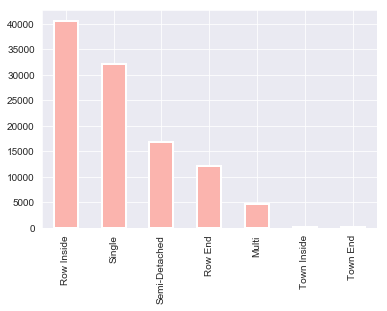

In [15]:
df['STRUCT']=df['STRUCT'].astype(str)
df= df[~df.STRUCT.str.contains("nan")]
df= df[~df.STRUCT.str.contains("Default")]
df= df[~df.STRUCT.str.contains("Vacant Land")]


df['STRUCT'].value_counts().plot(kind='bar',linewidth=2,colormap='Pastel1') 

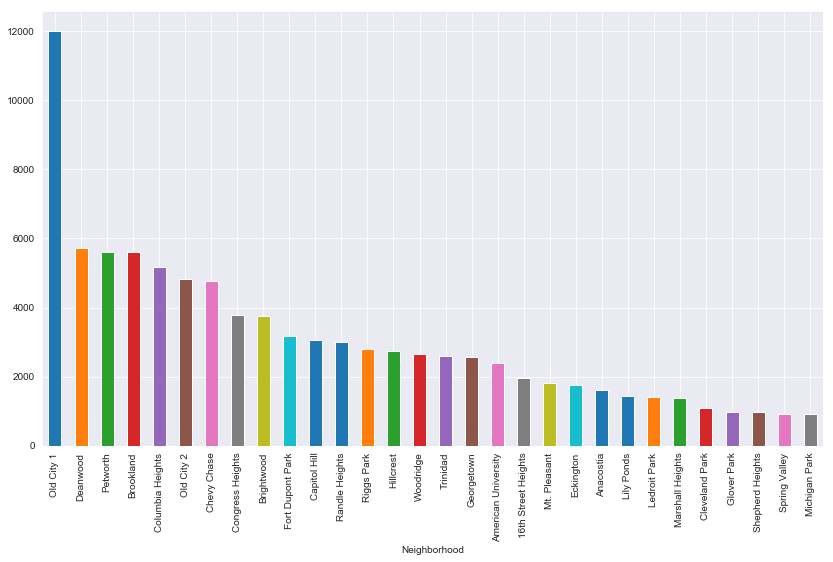

In [16]:
#Dropping various tiny neighborhoods
df['ASSESSMENT_NBHD']=df['ASSESSMENT_NBHD'].astype(str)
df=df[~df.ASSESSMENT_NBHD.str.contains("Woodley")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Foggy Bottom")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Observatory Circle")]
df=df[~df.ASSESSMENT_NBHD.str.contains("nan")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Wesley Heights")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Hawthorne")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Central-tri 1")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Massachusetts Avenue Heights")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Southwest Waterfront")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Barry Farms")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Foxhall")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Wakefield")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Garfield")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Fort Lincoln")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Colonial Village")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Berkley")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Brentwood")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Kalorama")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Crestwood")]
df=df[~df.ASSESSMENT_NBHD.str.contains("North Cleveland Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Burleith")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Forest Hills")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Kent")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Takoma Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Chillum")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Palisades")]



df['PPSQ']=df['PRICE']/df['GBA']
#nbhd=df1['ASSESSMENT_NBHD'].astype(float)

#nbhd=[df1['ASSESSMENT_NBHD']=='Old City 1','Deanwood','Petworth','Brookland','Old City 2','Columbia Heights','Chevy Chase','Congress Heights','Brightwood','Fort Dupont Park','Capitol Hill','Ridge Park','Hillcrest','Woodridge','Trinidad']
#'Old City 1'|'Deanwood'|'Petworth'|'Brookland'|'Old City 2'|'Columbia Heights'|'Chevy Chase'|'Congress Heights'|'Brightwood'|'Fort Dupont Park'|'Capitol Hill'|'Ridge Park'|'Hillcrest'|'Woodridge'|'Trinidad'
#'Old City 1','Deanwood','Petworth','Brookland','Old City 2','Columbia Heights','Chevy Chase','Congress Heights','Brightwood','Fort Dupont Park','Capitol Hill','Ridge Park','Hillcrest','Woodridge','Trinidad'
plt.figure(figsize=(14,8))
plt.xlabel('Neighborhood')
#.value_counts()
df['ASSESSMENT_NBHD'].value_counts().plot(kind='bar')
plt.show()

In [18]:
#preprocessing data
import sklearn.preprocessing as prep
#df1=df.drop(['PRICE'], axis=1)
df1=df.dropna()
X1=df1[['AYB','ROOF', 'GBA', 'STRUCT', 'HEAT']]
y=df1['ASSESSMENT_NBHD']
le = prep.LabelEncoder()
le.fit(y)
print(le.classes_)
Z=le.transform(y)
print(len(df1))
enc= prep.OneHotEncoder(handle_unknown='ignore')
enc.fit(X1)
X2= enc.transform(X1)

['16th Street Heights' 'American University' 'Anacostia' 'Brightwood'
 'Brookland' 'Capitol Hill' 'Chevy Chase' 'Cleveland Park'
 'Columbia Heights' 'Congress Heights' 'Deanwood' 'Eckington'
 'Fort Dupont Park' 'Georgetown' 'Glover Park' 'Hillcrest' 'Ledroit Park'
 'Lily Ponds' 'Marshall Heights' 'Michigan Park' 'Mt. Pleasant'
 'Old City 1' 'Old City 2' 'Petworth' 'Randle Heights' 'Riggs Park'
 'Shepherd Heights' 'Spring Valley' 'Trinidad' 'Woodridge']
49835


In [19]:
df2=df1.assign(freq=df1.groupby('ASSESSMENT_NBHD')['ASSESSMENT_NBHD'].transform('count')).sort_values(by=['freq','ASSESSMENT_NBHD'],ascending=[False,True]).loc[:,['ASSESSMENT_NBHD']]
#largest neighborhood
print(df2.head())
#smallest neighborhood
print(df2.tail())

     ASSESSMENT_NBHD
1156      Old City 1
1157      Old City 1
1158      Old City 1
1160      Old City 1
1162      Old City 1
       ASSESSMENT_NBHD
82266    Michigan Park
82269    Michigan Park
82270    Michigan Park
105028   Michigan Park
105030   Michigan Park


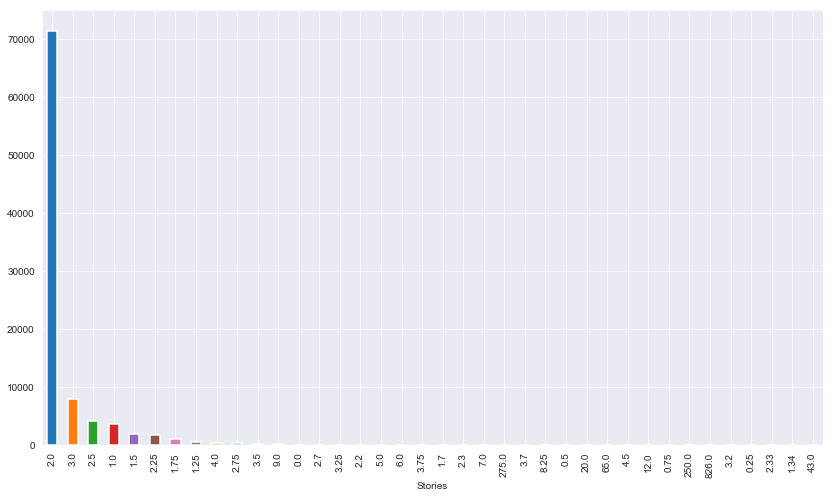

In [20]:
#Which is the most common type of housing from our Residential data set?
plt.figure(figsize=(14,8))
plt.xlabel('Stories')
df['STORIES'].value_counts().plot(kind='bar', linewidth=1.5)
plt.show()
#Clearly most buildings are 2 stories.

### Classifying neighborhoods in DC


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf = DecisionTreeClassifier(criterion="entropy")
X_train, X_test, y_train, y_test = train_test_split(Xd,Z,test_size=0.3)

clf.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))
#print(clf.get_params())

scores = cross_val_score(clf, X2, Z, cv=5)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))


0.4667915189619423
Accuracy: 36.44% (3.92%)


In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test= train_test_split(Xd, Z, test_size=0.3)
model = xgb.XGBClassifier(n_estimators=5, max_depth=5,objective='multi:softmax',max_features=0.8, min_samples_leaf= 0.04)
model.fit(X_train, y_train)
preds = model.predict(X_test)
predictions = [round(value) for value in preds]
xgb_param = model.get_xgb_params()
xgb_param['num_class'] = 43

XZ=xgb.DMatrix(X2,label=Z)

cvresults = xgb.cv(params=xgb_param,dtrain=XZ, num_boost_round=5)

print(cross_val_score(model, Xd, Z, cv=5))
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
print(model.get_params())
#XGBoost does not seem to give better accuracy.

[0.27299138 0.34185464 0.38388198 0.38283133 0.26863572]
accuracy: 0.378503
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 5, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In this cell I attempt stratified k-fold cross validation of the boosted trees model. Stratified cross-validation is useful in datasets with large numbers of classes, or where one class far outweighs the other.
This dataset meets both those criteria.

In [24]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


# CV model
model = xgb.XGBClassifier(n_estimators=5, max_depth=5,objective='multi:softmax',max_features=0.8, min_samples_leaf= 0.04)
kfold = StratifiedKFold(n_splits=5, random_state=7)
results = cross_val_score(model, X, Z, cv=kfold)
#Average of the cross-validation results, and standard deviation.
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

out = StringIO()
out = export_graphviz(clf, out_file='test/tree.dot')

NameError: name 'X' is not defined

### Regression 


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

yr= df1['PRICE']
Xd=pd.get_dummies(df1[['STORIES','GBA', 'AYB','STRUCT','ROOMS', 'ASSESSMENT_NBHD']])

le = prep.LabelEncoder()
le.fit(yr)
yr=le.transform(yr)
dt = DecisionTreeRegressor(max_depth=6,max_features=0.8, min_samples_leaf=0.13,)

X_train, X_test, y_train, y_test= train_test_split(Xd, yr,test_size=0.3,random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
negmse=metrics.make_scorer(MSE, greater_is_better=False, needs_proba=False, needs_threshold=False) 
scores = cross_val_score(dt, Xd, yr, cv=5, scoring=negmse)
#print("Average cross-validation score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Test set RMSE of dt: 1834.97


In [ ]:
#Finding best hyperparams for the XGBoost model.
from sklearn.model_selection import GridSearchCV

params_dt = {
                     'max_depth': [3,4,5,6],
                     'min_samples_leaf': [0.04, 0.06, 0.08],
                     'max_features': [0.2, 0.4,0.6, 0.8]
                     }

grid_dt = GridSearchCV(estimator=model, 
                               param_grid=params_dt,
                               scoring=negmse,                       
                               cv=5,
                               n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)


C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [27]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
# Predict test set labels 
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**0.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

dt.feature_importances_

Linear Regression test set RMSE: 1791.31
Regression Tree test set RMSE: 1851.56


array([0.        , 0.66652556, 0.33347444, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

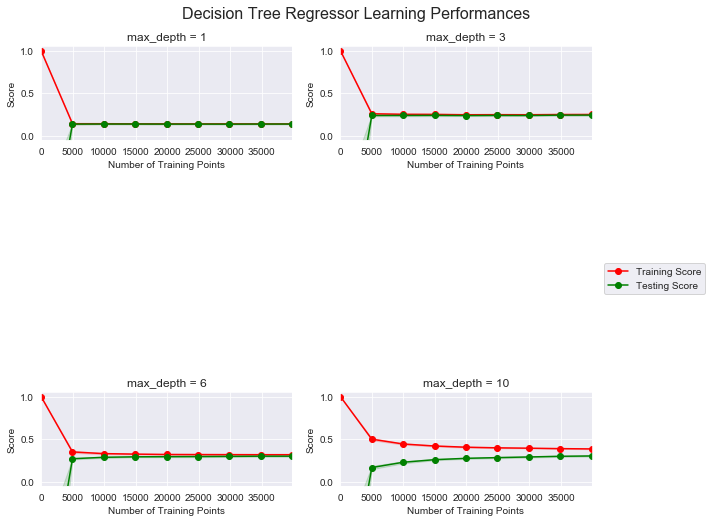

In [28]:
import visuals as vs
vs.ModelLearning(Xd, yr)

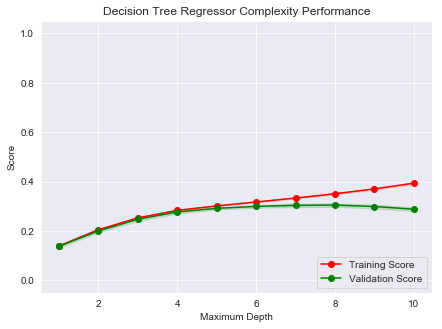

In [29]:
vs.ModelComplexity(X_train, y_train)

### Conclusions
We see that our decision tree model, no matter how tuned, produced a larger error than a simple, untuned linear regression model. Either results are very accurate, though, and would serve as a useful guide for homesellers. From the ModelLearning visualization, it doesn't appear to be a difficult dataset to tune for Regression.

A basic decision tree model scored about 50% on classifying the 30 largest neighborhoods.
A boosted tree scored lower, and a 5-fold stratified cross-validation model, with GridSearchCV to tune for optimal hyperparamters, scored even lower. 

It's my opinion that there is no underlying pattern in this data for predicting the neighborhoods. The attempts were fairly exhaustive. I can, however, implement different models in the future.
This probably reflects the fact that there is no standard definition of a neighborhood.

In [ ]:
#Predicting most valuable features: which features influence price the most?
